# Práctica 4: Ipyhton notebook con pruebas, resultados y análisis

<br>**Asignatura:** Prácticas de Fundamentos de Aprendizaje Automático</br>
<br>**Autores:** Albert Soler y Alfonso Sebares</br>

------------------------------------

### Notas relevantes (actualizado para la Práctica 4):
* **Para ver obetener los resultados que que hemos extraído para las tablas, ejecutar `testEnsemble.py` incluído con el código de la práctica. Por simplificar la implementación, se han reutilizado estructuras anteriores para las pruebas resultando en un fichero muy largo de ejecución como para incluirse de manera presentable en este Notebook.** <br><br>

* Si se ejecuta el programa directamente sobre el intérprete de python de la máquina, también será imprescindible la versión 0.18 o más para el correcto funcionamiento de las pruebas scikit-learn.<br><br>

* Se incluye el fichero `run_completo.txt` con una ejecución completa de las pruebas de los distintos algoritmos de manera individual además del *Ensemble* (nuestro + sklearn) para cada conjunto de datos.

------------------------------------

### Qué hay en este notebook:

De manera estructurada por los apartados especificados con respecto al Ipython Notebook, se incluyen las explicaciones de la práctica e instrucciones necesarias para realizar las pruebas (ver *Notas relevantes*) descritas en el apartado 1 y 2 del enunciado con una breve descripción y análisis de dichas pruebas al final.

------------------------------------

### Índice:
1. **Apartado 1 - Efectividad del *ensemble* sobre los distintos conjuntos de datos **
2. **Apartado 2 - Resultados del Apartado 1 utilizando sklearn **
3. **Apartado 3 - Matriz de confusión para el conjunto digits**

------------------------------------

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from IPython.display import Image

### Apartado 1
Efectividad del `ensemble` de clasificadores sobre los diferentes conjuntos de datos, comparada con los clasificadores individuales en forma de tabla.

*Tabla de resultados de las pruebas en % de errores de media.*
- Validación cruzada, 5 folds
- 10 épocas, constante de aprenizaje 1
- Vecinos con k=7
- Normalización en `wine` y `digits`

|             |Ensamble|NaiveBayes|VecinosProximos|RegresionLogistica/Mulitclase|
|:------------:|:-----------:|:--------:|:---------:|:-----------:|:-----------:|:-----------:|
| **wine**|7,22|64,55|6,12|2,82|
| **tic-tac-toe**  |25,25|30,69|16,80|35,07|
| **titanic**  |22,84|23,13|21,32|48,96|
| **digits**  |23,40|90,63|16,06|21,91|

#### Análisis de resultados:
- **wine:** Seguimos arrastrando algún tipo de problema no resuelto con los atributos continuos en NaiveBayes a pesar de las correcciones como ya hemos mencionado anteriormente. Sin embargo, esta media de errores alta aislada se normaliza dentro de Ensemble a la hora de elegir la clase mayoritaria en las predicciones, por lo que no afecta a su resultado.<br><br>
- **tic-tac-toe:** Las medias de errores están dentro de lo esperado como ya sabíamos y comentamos en prácticas anteriores para los distintos clasificadores. Cabe destacar la tasa de errores "alta" para Regresión Logísitca, aunque era de esperar dado que es un conjunto de datos dónde sólo hay atributos nominales.
- **titanic:** Similar a tic-tac-toe, obtenemos una tasa de errores similar (ligeramente superior). De nuevo ninguno de los clasificadores se comporta de manera inesperada con respecto a lo que ya hemos visto en las prácticas.<br><br>
- **digits:** En este último conjunto es donde vemos que el tiempo de ejecución de Vecinos Próximos merece la pena al comportarse mejor que el resto de algoritmos, de manera similar a cómo lo hacía en al práctica anterior VS Regresión Logística. Ya vimos también que Naive Bayes tenía problemas con este conjunto de datos al asumir la independencia entre atributos para un problema cómo este.<br><br>
- **En resumen:** Ensamble "normaliza" los resultados de los algoritmos con una tasa de error alta siempre y cuando no sean varios los que se comportan de esa manera, tomando las predicciones correctas de forma mayoritaria para los que sí aciertan.

------------------------------------

### Apartado 2

Resultados de clasificación mediante conjuntos de clasificadores en los cuatro conjuntos de datos utilizando la libreríá scikit-learn.

*Tabla de resultados de las pruebas en % de errores de media.*
- Validación cruzada, 5 folds
- 10 épocas, constante de aprenizaje 1
- Vecinos con k=7
- Normalización en `wine` y `digits`

|             |Ensamble<br>Implementacion|Ensamble <br>[sciki-learn]|
|:------------:|:-----------:|:--------:|
| **wine**|7,22|3,92|
| **tic-tac-toe**  |25,25|26,72|
| **titanic**  |22,84|22,08|
| **digits**  |23,40|16,06|

------------------------------------

### Apartado 3
Matriz de confusión para el conjunto digits usando el `ensemble`.<br><br>
**NOTA:** Dado que nos salían unas gráficas sin mucho sentido, explicamos a continuación nuestra interpretación basado en el output en forma de texto.

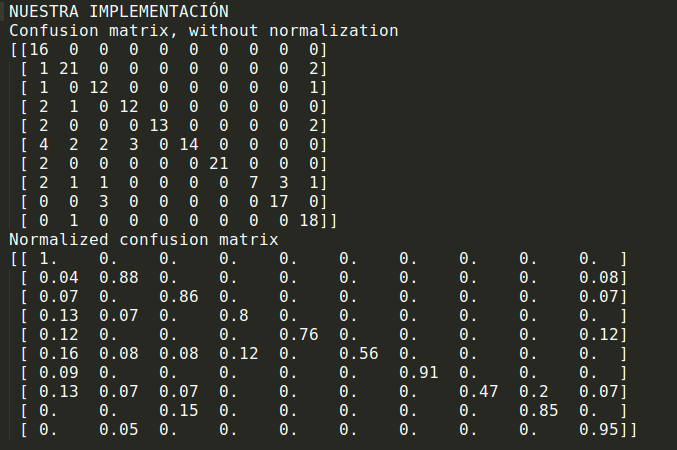

In [3]:
Image(filename="MATRIZ_implementacion.png")

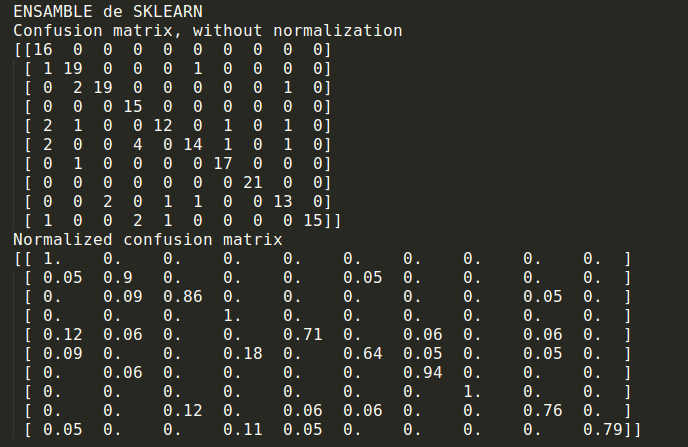

In [4]:
Image(filename="MATRIZ_sklearn.png")

#### Observaciones:

- **NOTA:** Las columnas son las predicciones y las filas la clase verdadera. 
- En una matriz de confusión los valores fuera de la diagonal corresponden con los errores. Para nuestra implementación del Ensamble predice demasiadas veces (más de las actuales) los números 0, 1 , 2 y 9 principalmente. El número 0 lo acierta siempre, pero el número 7 menos de la mitad de las veces (47%), así que es muy probable que el 7 lo esté prediciendo como el 1. El 5 solo lo acierta en un 56%.

- Respecto a Sklearn, vemos como obtiene resultados más correctos y por lo tanto más fiable pero falla principalment prediciendo demasiado el número 0 , 1 y 3. Respecto a los porcentajes de acierto, también falla en el 5, acertando en un 64% y el siguiente peor el 4 que lo acierta en un 71% de veces. 

------------------------------------